In [1]:
import main
import numpy as np
import matplotlib.pyplot as plt

../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened
1
2


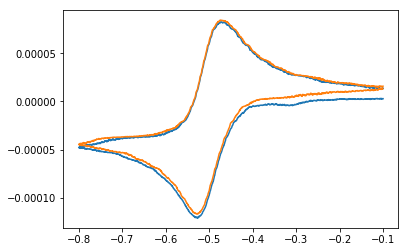

In [4]:
dict_1,n_cycle = main.read_file('../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
for i in range(n_cycle):
        print(i+1)
        df = main.data_frame(dict_1, i+1)
        plt.plot(df.Potential, df.Current, label = "Cycle{}".format(i+1))


In [6]:
df = main.data_frame(dict_1,1)
x = df['Potential']
y = df['Current']
main.peak_currents(df,[838],'Current')

array([-0.0001184])

In [26]:
for i in range(n_cycle-1):
    i = i+1
    df = main.data_frame(dict_1,i)
    x = df['Potential']
    y = df['Current']
  
    peak_index = main.peak_detection(y)
    
    x1,x2 = main.split(x)
    y1,y2 = main.split(y)
    y_base1 = main.linear_background(x1,y1)
    y_base2 = main.linear_background(x2,y2)
    
   

IndexError: index 0 is out of bounds for axis 0 with size 0

[[781, 2]]
-0.000118403
2.93533e-06
4.33452e-05
-4.73415e-05
(2801,)


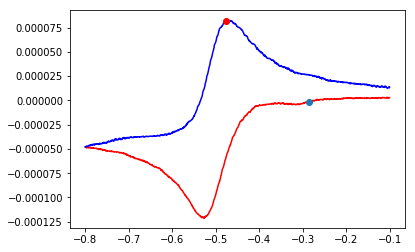

In [15]:
df = main.data_frame(dict_1,1)
x = df['Potential']
y = df['Current']
peak_index = main.peak_detection(y)
print(peak_index)
plt.plot(x1,y1,color ='red')
plt.plot(x2,y2,color = 'blue')
plt.plot(x1[371],y1[371],marker='o')
plt.plot(x2[650],y2[650],marker='o',color = 'red')
print(y1[838])
print(y1[8])
print(y2[838])
print(y2[8])
print(x.shape)

In [27]:
def critical_idx(x, y): ## Finds index where data set is no longer linear 
    """
    This function takes x and y values callculate the derrivative of x and y, and calculate moving average of 5 and 15 points.
    Finds intercepts of different moving average curves and return the indexs of the first intercepts.
    """
    k = np.diff(y)/(np.diff(x)) #calculated slops of x and y

    ## Calculate moving average for 5 and 15 points.
    ## This two arbitrary number can be tuned to get better fitting.
    ave5 = []
    ave15 = []
    for i in range(len(x)-5):  # The reason to minus 5 is to prevent j from running out of index.
        a = 0 
        for j in range(0,5):
            a = a + k[i+j]
        ave5.append(round(a/5, 9)) # keeping 9 desimal points for more accuracy
    ave5 = np.asarray(ave5)
    for i in range(len(x)-15): 
        b = 0 
        for j in range(0,15):
            b = b + k[i+j]
        ave15.append(round(b/15, 9))
    ave15 = np.asarray(ave15)
    ## Find intercepts of different moving average curves
    idx = np.argwhere(np.diff(np.sign(ave15 - ave5[:len(ave15)])!= 0)).reshape(-1) #reshape into one row.
    return int(idx[0])

In [28]:
critical_idx(x1,y1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [27]:
critical_idx(x2,y2)

IndexError: index 0 is out of bounds for axis 0 with size 0